  Position spread (micrometers): sigma_x=483.59, sigma_y=362.69, sigma_z=290.15
  Velocity spread (cm/s): sigma_vx=4.56, sigma_vy=4.56, sigma_vz=4.56


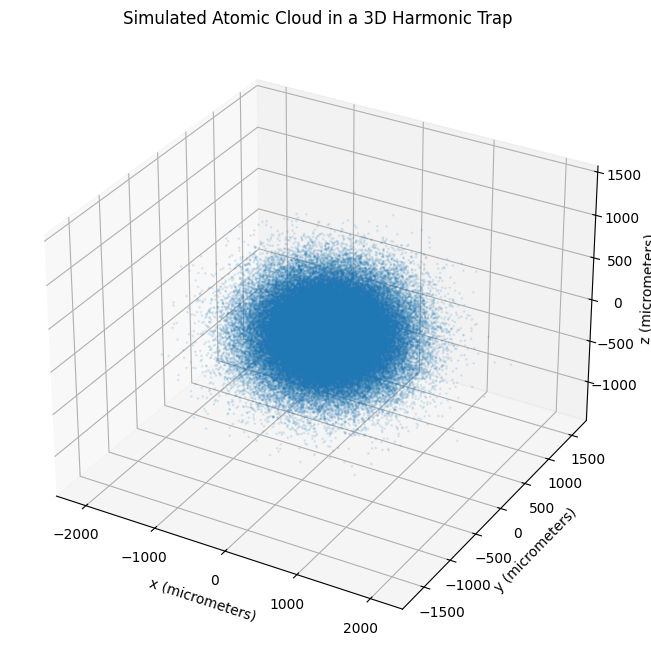

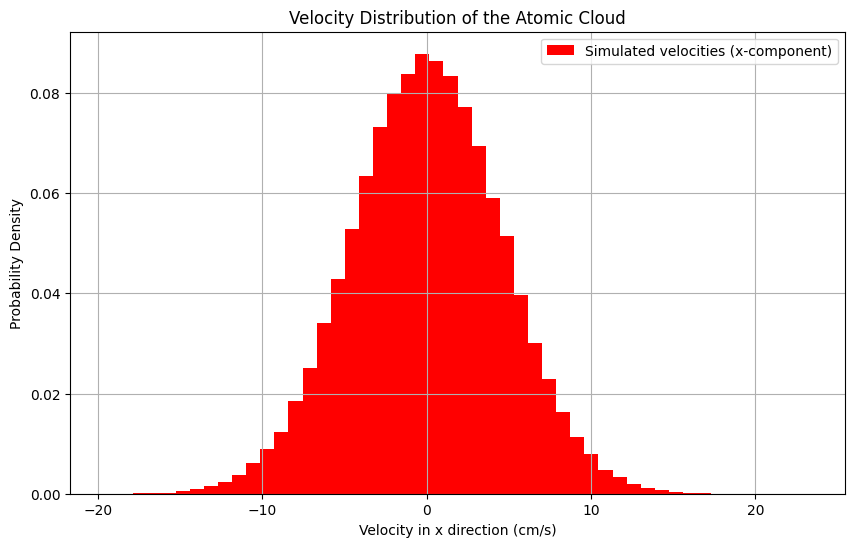

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

m_He = 4.002603 * 1.66054e-27
k_B = 1.380649e-23

N = 10**5
T = 1e-6
fx, fy, fz = 15, 20, 25
wx = 2 * np.pi * fx
wy = 2 * np.pi * fy
wz = 2 * np.pi * fz

# Standard deviation of position distribution
sigma_x = np.sqrt(k_B * T / (m_He * wx**2))
sigma_y = np.sqrt(k_B * T / (m_He * wy**2))
sigma_z = np.sqrt(k_B * T / (m_He * wz**2))
# Standard deviation of velocity distribution
sigma_vx = np.sqrt(k_B * T / m_He)
sigma_vy = sigma_vx
sigma_vz = sigma_vx

# Generate positions from a 3D distribution
positions = np.random.normal(0, [sigma_x, sigma_y, sigma_z], (N, 3))

# Generate velocities from a 3D Maxwell-Boltzmann distribution
velocities = np.random.normal(0, [sigma_vx, sigma_vy, sigma_vz], (N, 3))

print(f"  Position spread (micrometers): sigma_x={sigma_x*1e6:.2f}, sigma_y={sigma_y*1e6:.2f}, sigma_z={sigma_z*1e6:.2f}")
print(f"  Velocity spread (cm/s): sigma_vx={sigma_vx*100:.2f}, sigma_vy={sigma_vy*100:.2f}, sigma_vz={sigma_vz*100:.2f}")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(positions[:, 0]*1e6, positions[:, 1]*1e6, positions[:, 2]*1e6, s=1, alpha=0.1)
ax.set_title("Simulated Atomic Cloud in a 3D Harmonic Trap")
ax.set_xlabel("x (micrometers)")
ax.set_ylabel("y (micrometers)")
ax.set_zlabel("z (micrometers)")
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(velocities[:, 0]*100, bins=50, density=True, label='Simulated velocities (x-component)',color='red')
# Plot the theoretical Maxwell-Boltzmann distribution
v = np.linspace(-5 * sigma_vx, 5 * sigma_vx, 1000)
pdf = np.exp(-0.5 * (v / sigma_vx)**2) / (sigma_vx * np.sqrt(2 * np.pi))
# plt.plot(v*100, pdf, 'r-', label='Theoretical Maxwell-Boltzmann distribution')
plt.title("Velocity Distribution of the Atomic Cloud")
plt.xlabel("Velocity in x direction (cm/s)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

--- Diag for Detuning = -2.44 MHz (at t=0) ---
  - Avg total detuning: -2.438 MHz
  - Avg scattering rate: 9713.45 photons/sec
  - Avg prob_excite in dt: 0.000048
--------------------------------------------------
  Freq Detuning: -2.44 MHz, Remaining Atoms: 99954/100000
--- Diag for Detuning = -2.19 MHz (at t=0) ---
  - Avg total detuning: -2.195 MHz
  - Avg scattering rate: 11713.95 photons/sec
  - Avg prob_excite in dt: 0.000057
--------------------------------------------------
  Freq Detuning: -2.19 MHz, Remaining Atoms: 99792/100000
--- Diag for Detuning = -1.95 MHz (at t=0) ---
  - Avg total detuning: -1.951 MHz
  - Avg scattering rate: 14359.89 photons/sec
  - Avg prob_excite in dt: 0.000070
--------------------------------------------------
  Freq Detuning: -1.95 MHz, Remaining Atoms: 99349/100000
--- Diag for Detuning = -1.71 MHz (at t=0) ---
  - Avg total detuning: -1.707 MHz
  - Avg scattering rate: 17933.79 photons/sec
  - Avg prob_excite in dt: 0.000088
------------------

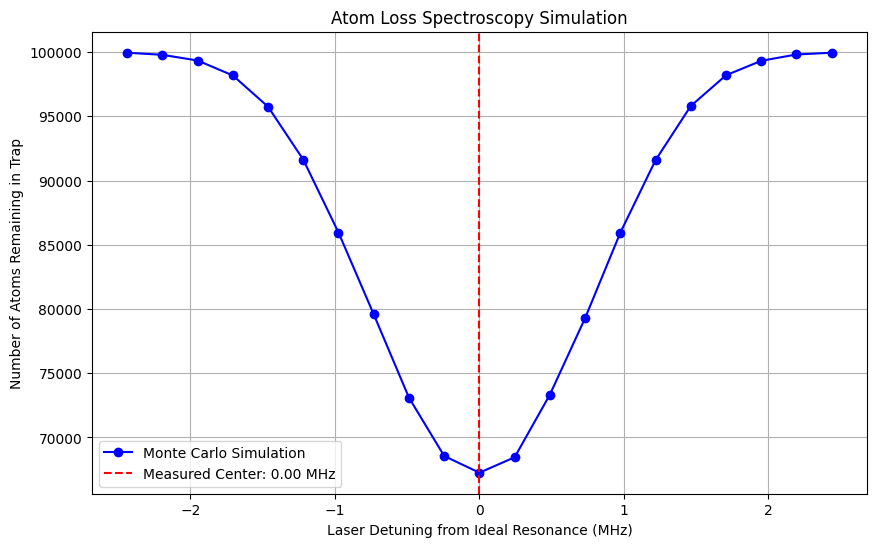


Ideal atomic frequency: 276764.094455 GHz
Measured central frequency: 276764.094455 GHz
This corresponds to a detuning of 0.000 MHz from the ideal frequency.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, hbar, c, k as k_B

# --- Physical Constants and Atomic Properties ---
m_He = 4.002603 * 1.66054e-27
k1 = 159855.971776
k2 = 169087.82825101
f_atom_ideal = c * (k2 - k1) * 100
lambda_trans = 1 / ((k2 - k1) * 100)
k_wavevector_mag = 2 * np.pi / lambda_trans

tau = 97.9e-9
Gamma_rad_s = 1 / tau
decay_rate_Hz = 1 / tau
Gamma_Hz = 1/tau
spectroscopic_FWHM_Hz = Gamma_rad_s / (2 * np.pi)

# --- Laser Parameters (Restored to more realistic values) ---
P_laser = 5e-6
w0 = 1e-2
I_laser = 2 * P_laser / (np.pi * w0**2)
I_sat = (np.pi * h * c) / (3 * lambda_trans**3 * tau)
s0 = I_laser / I_sat

# --- Experiment and Simulation Parameters ---
N = 10**5
T = 1e-6
fx, fy, fz = 15, 20, 25
T_probe = 5e-3
dt = tau / 20
num_steps = int(T_probe / dt)
U_trap = k_B * 1e-3

# --- Initial Cloud Generation ---
wx = 2 * np.pi * fx
wy = 2 * np.pi * fy
wz = 2 * np.pi * fz
sigma_x = np.sqrt(k_B * T / (m_He * wx**2))
sigma_y = np.sqrt(k_B * T / (m_He * wy**2))
sigma_z = np.sqrt(k_B * T / (m_He * wz**2))
sigma_v = np.sqrt(k_B * T / m_He)
initial_positions = np.random.normal(0, [sigma_x, sigma_y, sigma_z], (N, 3))
initial_velocities = np.random.normal(0, sigma_v, (N, 3))

# --- Monte-Carlo Simulation ---
detuning_range_Hz = np.linspace(-1.5 * spectroscopic_FWHM_Hz, 1.5 * spectroscopic_FWHM_Hz, 21)
laser_frequencies = f_atom_ideal + detuning_range_Hz
k_vec = np.array([0, 0, k_wavevector_mag])
remaining_atoms_vs_freq = []

for i, f_laser in enumerate(laser_frequencies):
    # BUG FIX 2: Always start with the fresh, cold cloud
    velocities = np.copy(initial_velocities)
    atom_states = np.zeros(N, dtype=int)
    atom_is_trapped = np.ones(N, dtype=bool)

    for step in range(num_steps):
        trapped_indices = np.where(atom_is_trapped)[0]
        if len(trapped_indices) == 0: # Optimization: stop if all atoms are lost
            break

        ground_indices = np.where(atom_states[trapped_indices] == 0)[0]
        doppler_shifts_rad_s = np.dot(velocities[trapped_indices[ground_indices]], k_vec)
        detunings_rad_s = 2 * np.pi * (f_laser - f_atom_ideal) - doppler_shifts_rad_s


        scattering_rates = (Gamma_rad_s / 2) * (s0 / (1 + s0 + (2 * (detunings_rad_s) / Gamma_rad_s)**2))
        prob_excite = scattering_rates * dt
        # Checking scattering rate
        if step == 0: # Only print for the first time step
            print(f"--- Diag for Detuning = {detuning_range_Hz[i]/1e6:+.2f} MHz (at t=0) ---")

            # Check the average detuning. Is it what you expect?
            avg_detuning_MHz = np.mean(detunings_rad_s) / (2 * np.pi * 1e6)
            print(f"  - Avg total detuning: {avg_detuning_MHz:+.3f} MHz")

            # What is the calculated scattering rate?
            avg_rate_photons_s = np.mean(scattering_rates)
            print(f"  - Avg scattering rate: {avg_rate_photons_s:.2f} photons/sec")

            # What is the final probability of excitation in one time step?
            avg_prob = np.mean(prob_excite)
            print(f"  - Avg prob_excite in dt: {avg_prob:.6f}") # Print with more precision
            print("-" * 50)
        # Checking part end
        excited_mask = np.random.rand(len(ground_indices)) < prob_excite
        atoms_to_excite = trapped_indices[ground_indices[excited_mask]]
        atom_states[atoms_to_excite] = 1

        excited_indices = np.where(atom_states[trapped_indices] == 1)[0]
        prob_decay = decay_rate_Hz * dt
        decay_mask = np.random.rand(len(excited_indices)) < prob_decay
        atoms_to_decay = trapped_indices[excited_indices[decay_mask]]
        atom_states[atoms_to_decay] = 0

        if len(atoms_to_decay) > 0:
            v_recoil = hbar * k_wavevector_mag / m_He
            phi = 2 * np.pi * np.random.rand(len(atoms_to_decay))


            costheta = 2 * np.random.rand(len(atoms_to_decay)) - 1
            sintheta = np.sqrt(1 - costheta**2)

            recoil_vecs = v_recoil * np.array([sintheta * np.cos(phi), sintheta * np.sin(phi), costheta]).T
            velocities[atoms_to_decay] += recoil_vecs
            kinetic_energy = 0.5 * m_He * np.sum(velocities[atoms_to_decay]**2, axis=1)
            lost_mask = kinetic_energy > U_trap
            atoms_that_were_lost = atoms_to_decay[lost_mask]
            atom_is_trapped[atoms_that_were_lost] = False

    final_atom_count = np.sum(atom_is_trapped)
    remaining_atoms_vs_freq.append(final_atom_count)
    print(f"  Freq Detuning: {detuning_range_Hz[i]/1e6:+.2f} MHz, Remaining Atoms: {final_atom_count}/{N}")

# ... (The rest of the plotting code is fine) ...

min_atoms = np.min(remaining_atoms_vs_freq)
min_index = np.argmin(remaining_atoms_vs_freq)
measured_central_freq = laser_frequencies[min_index]
measured_detuning_Hz = detuning_range_Hz[min_index]

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(detuning_range_Hz / 1e6, remaining_atoms_vs_freq, 'bo-', label='Monte Carlo Simulation')
plt.axvline(measured_detuning_Hz / 1e6, color='r', linestyle='--', label=f'Measured Center: {measured_detuning_Hz/1e6:.2f} MHz')
plt.title('Atom Loss Spectroscopy Simulation')
plt.xlabel('Laser Detuning from Ideal Resonance (MHz)')
plt.ylabel('Number of Atoms Remaining in Trap')
plt.grid(True)
plt.legend()
plt.show()

print(f"\nIdeal atomic frequency: {f_atom_ideal / 1e9:.6f} GHz")
print(f"Measured central frequency: {measured_central_freq / 1e9:.6f} GHz")
print(f"This corresponds to a detuning of {measured_detuning_Hz / 1e6:.3f} MHz from the ideal frequency.")

